#  Convolutional Neural Networks

###  **DSBA 6165: AI & Deep Learning**
### Minwoo "Jake" Lee

## Goal

The goal of this lab activity is practicing to build a convolutional neural network class. For this, we break down each component of a CNN before building the complete network. We use CIFAR-10 dataset that contains 10 classes of images. 

Let us first import the libraries we are going to use. TensorFlow for DL models, matplotlib for plotting data/results, numpy and pandas for data handling. 

In [173]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, datasets
print("TF version:", tf.__version__)

import matplotlib.pyplot as plt   
import numpy as np
import pandas as pd
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
from keras.utils import to_categorical, plot_model

%matplotlib inline

TF version: 2.20.0


## Loading Data

### CIFAR-10


[The CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Here are the classes in the dataset, as well as 10 random images from each:
<table>
    <tr>
        <td class="cifar-class-name">airplane</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane10.png" class="cifar-sample" /></td>
    </tr>
    <tr>
        <td class="cifar-class-name">automobile</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile10.png" class="cifar-sample" /></td>
    </tr>
    <tr>
        <td class="cifar-class-name">bird</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird10.png" class="cifar-sample" /></td>
    </tr>
    <tr>
        <td class="cifar-class-name">cat</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat10.png" class="cifar-sample" /></td>
    </tr>
    <tr>
        <td class="cifar-class-name">deer</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer10.png" class="cifar-sample" /></td>
    </tr>
    <tr>
        <td class="cifar-class-name">dog</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog10.png" class="cifar-sample" /></td>
    </tr>
    <tr>
        <td class="cifar-class-name">frog</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog10.png" class="cifar-sample" /></td>
    </tr>
    <tr>
        <td class="cifar-class-name">horse</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse10.png" class="cifar-sample" /></td>
    </tr>
    <tr>
        <td class="cifar-class-name">ship</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship10.png" class="cifar-sample" /></td>
    </tr>
    <tr>
        <td class="cifar-class-name">truck</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck10.png" class="cifar-sample" /></td>
    </tr>
</table>									

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

**Reference**

This tech report (Chapter 3) describes the dataset and the methodology followed when collecting it in much greater detail. Please cite it if you intend to use this dataset.
Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.

### TODO1
1.Load the `datasets.cifar10` dataset using the `load_data()` method. Unpack the data into two pairs of arrays (x train,y train) for the training set and (x test,y test) for the test set.

In [3]:
(x_train, y_train),(x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [32]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

### TODO 1.1
1. Check shapes of x_train , x_test and y_test
  * Hint:To get the dimensions of data, we use the `shape` method in Python 

In [4]:
x_train.shape , x_test.shape, y_test.shape 

((50000, 32, 32, 3), (10000, 32, 32, 3), (10000, 1))

In [8]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

Most image pixel values range from zero to 255. We can simply transform the value range [0, 255] to [0, 1] by dividing the pixel values by 255. This is a common preprocessing step to normalize the pixel values of a image. Input range between 0 and 1 helps the network to converge faster and improve the performance. Furthermore, high-intensity pixels (200~255), brighter pixels, in the image often have strong influence on the model prediction, thus scaling it down makes training more stable. 
Let us try this first.  


### TODO 1.2
1. Normalize the pixel values in the x train and x test to [0,1]

In [ ]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

## Visualize the data


### TODO 2
1. Determine the number of distinct values in the target variable(y_train).
    1. Hint: use `unique` function: [Link](https://numpy.org/doc/stable/reference/generated/numpy.unique.html) 

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Now let's see the image of a training sample using the following function `imshow` [(Reference_link)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html). In matplotlib the "imshow" function is used to display the image 

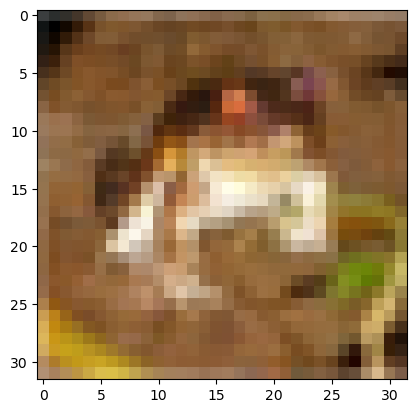

In [18]:
plt.imshow(x_train[0])

### TODO 2.1
1. Now our next goal is to create image plotting function which should take arguments as x , title and bot. 
    1. The function should display the tensor (i.e your argument 'x') as an image using `imshow`.
    1. we have to remove the axis of images to remove we use the `xticks` and `yticks` methods, respectively. ([Reference_link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html))
    1. Now that we removed the axis our function should now label using `xlabel` and take argument as bot. ([Reference_link](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlabel.html))
        


In [40]:
def show_img(x, title="", bot=""): ## bot is bottom
    plt.imshow(x)
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    plt.xlabel(bot)

Now that we have created a image plotting function above lets plot our images from "x_train" tensor
### TODO 2.2
1. using `figure` ([Reference_link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)),create a Matplotlib figure with a specified size of (10, 5).
    1. write a for loop which take range of 10 values.
    2. using `subplot` ([Reference_link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)) mention the number of rows your images should be displayed for example below output show 2 rows and 5 columns and another argument as i+1
    3. Lets use the `show_img` function we have created and give 3 arguments, 1st argument is every element of x_train and and the second is title of each image is set to the corresponding label from the `s_labels` list and the index of the label in "y_train". 
    4. Exit the loop adjust the subplots to fit the figure size using `tight_layout` ([Reference_link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html)) function .


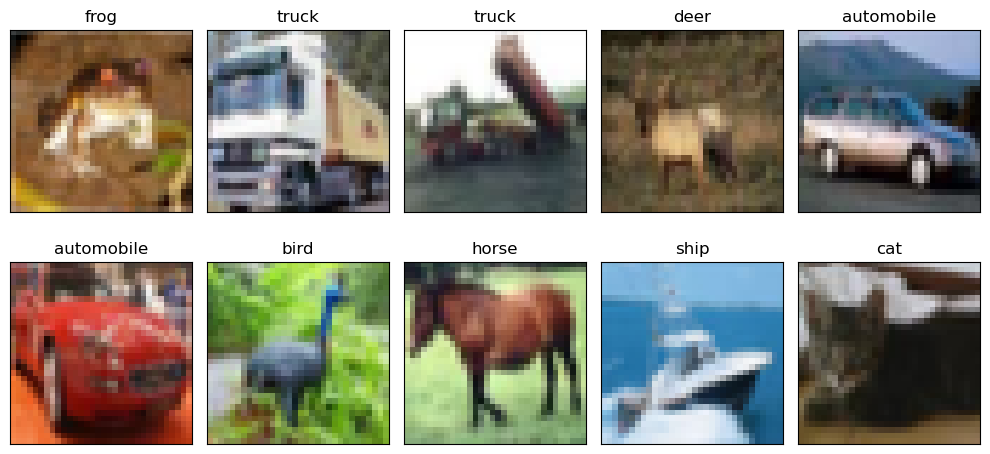

In [37]:
plt.figure(figsize = (10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    show_img(x_train[i], labels[y_train[i,0]])

plt.tight_layout()

## Convolution
A convolution is a linear operation that involves multiplying a set of weights with the input to yield a two-dimensional array of weights called a filter. If the filter is tuned to detect a specific type of feature in the input, then the repetitive use of that filter across the entire input image can discover that feature anywhere in the image.
[Refer to this link](https://www.nvidia.com/en-us/glossary/data-science/convolutional-neural-network/)

The process of convolution can be understood as a way of "blending" or "mixing" one function with another, often by expressing the amount of overlap of one function as it is shifted over the other function. This operation is essential for tasks such as filtering, feature detection, and understanding the relationships between different signals or functions. In the context of image processing, for example, convolution is used to implement operators that modify or extract information from images, such as edge detection and blurring.


Here the values being assigned are the dimensions of x_train in the order batch_size, height, width, and channels.

In [38]:
batch_size, height, width, channels = x_train.shape

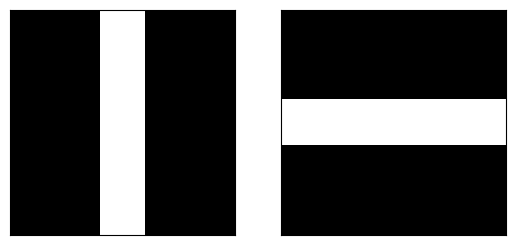

In [41]:
filters = np.zeros(shape=(5,5,channels,2))
filters[:, 2, :, 0] = 1
filters[2, :, :, 1] = 1

plt.subplot(1,2,1)
show_img(filters[:, :, :, 0])
plt.subplot(1,2,2)
show_img(filters[:, :, :, 1])

### TODO: 3
1. computes a 2-D convolution (`tf.nn.conv2d`) with the input argument x train(no of samples as 10) while maintaining the filters as filters, strides as "1", and padding as "SAME". [Reference_link](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d)

In [50]:
two_d_conv = tf.nn.conv2d(
    x_train[:10],
    filters,
    1, #strides
    "SAME", # padding
    data_format='NHWC',
    dilations=None,
    name=None
)

In [51]:
two_d_conv.shape

TensorShape([10, 32, 32, 2])

### TODO: 3.1
1. Using the `show_img` function which you have created above plot i'th input in `x_train`
2. using the `show_img` function and plot the i'th `out` which created above selecting 0th channel as 4th argument.
3. using the `show_img` function and plot the i'th `out` which created above selecting 1st channel as 4th argument.

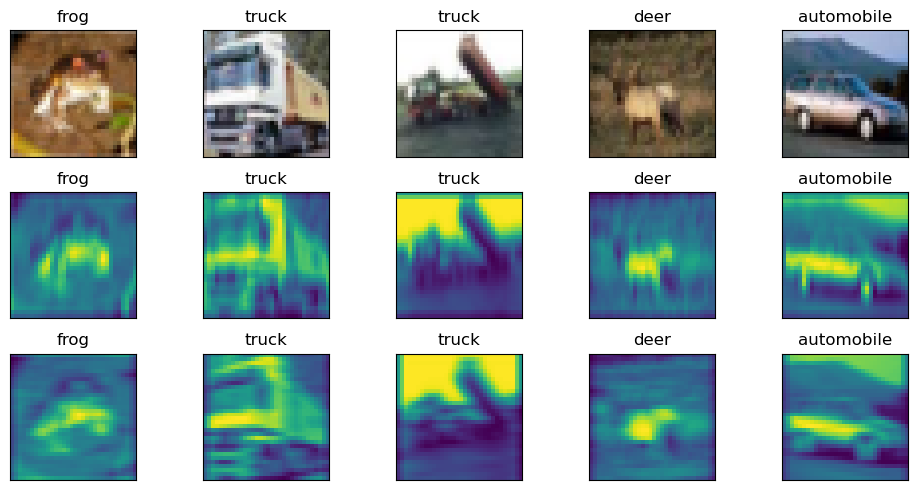

In [58]:
plt.figure(figsize = (10,5))
for i in range(5):
    plt.subplot(3,5,i+1)
    show_img(x_train[i], labels[y_train[i,0]])

    plt.subplot(3,5,i+6)
    show_img(two_d_conv[i, :, :, 0], labels[y_train[i,0]])

    plt.subplot(3,5,i+11)
    show_img(two_d_conv[i, :, :, 1], labels[y_train[i,0]])

plt.tight_layout()

### TODO: 3.2
1. Now our next goal is to create image plotting function(show_out) which should take arguments as x , and n_imgs. 
    1. write a for loop which take range `n_imgs`.
    1. create a `subplot` with two figures in a row showing the output first image in `x` fro two channels respectively. 

In [97]:
def show_out(x, n_imgs = 2):
    plt.figure(figsize = (10,8) if n_imgs == 2 else (10,6))
    for i in range(n_imgs):
        plt.subplot(2,n_imgs, i+1)
        show_img(x[i, :, :, 0])

        plt.subplot(2,n_imgs, i+1+n_imgs)
        show_img(x[i, :, :, 1])

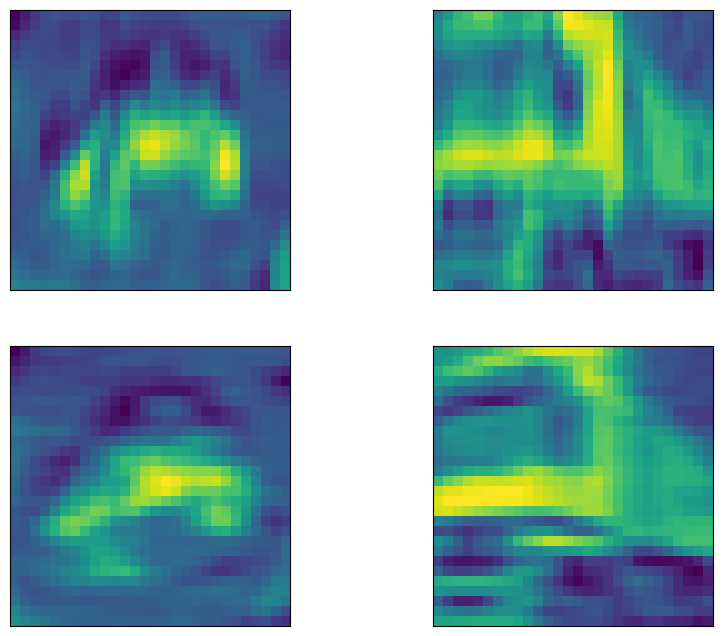

In [98]:
show_out(two_d_conv)

### TODO: 3.3
1. Print out the shape of your `out`.

In [ ]:
two_d_conv.shape

TensorShape([10, 32, 32, 2])

## Padding

 `Padding` refers to the technique of adding layers of zeros around the input data. This is done to control the spatial dimensions of the output volumes after convolution operations, and to ensure that the spatial dimensions of the input and output volumes are compatible.

The main benefits of padding are the following:
1. It allows you to use a CONV layer without necessarily shrinking the height and width of the volumes. This is important for building deeper networks, since otherwise the height/width would shrink as you go to deeper layers. An important special case is the "same" convolution, in which the height/width is exactly preserved after one layer.
2. It helps us keep more of the information at the border of an image. Without padding, very few values at the next layer would be affected by pixels as the edges of an image.
[Refer to this link for better understanding](https://medium.com/codex/why-padding-is-important-in-convolutional-neural-network-cnn-8cf7e9e38ca8)

### TODO: 4
1. Compute the conv2d feel free to use the `out`(convolution 2d) which you have created above but this time use padding as "VALID" padding ([Reference_link](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d)) and rest will remain same.


In [66]:
two_d_conv_valid = tf.nn.conv2d(
    x_train[:10],
    filters,
    strides = 1, #strides
    padding = "VALID", # padding
    data_format='NHWC',
    dilations=None,
    name=None
)

### TODO: 4.1
1. Using `show_out` function which we have created above plot the `out1`.
1. Examine the shape of your `out1`

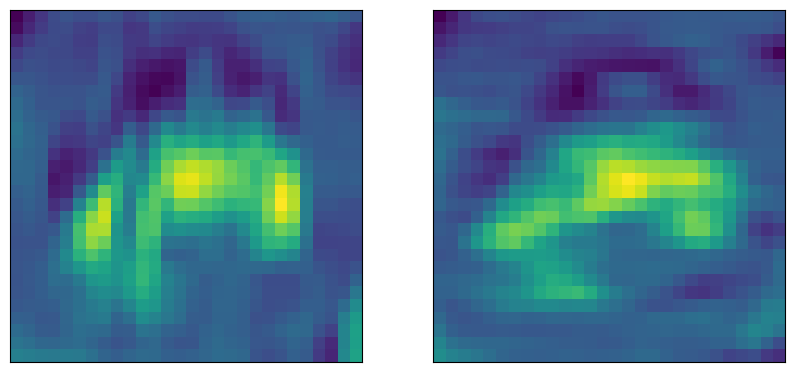

In [ ]:
show_out(two_d_conv_valid)

In [69]:
two_d_conv_valid.shape

TensorShape([10, 28, 28, 2])

## Stride
Stride is the number of pixels shifts over the input matrix.

It is a component of convolutional neural networks, or neural networks tuned for the compression of images and video data. Stride is a parameter of the neural network's filter that modifies the amount of movement over the image or video. For example, if a neural network's stride is set to 1, the filter will move one pixel, or unit,  at a time. The size of the filter affects the encoded output volume, so stride is often set to a whole integer, rather than a fraction or decimal. [Refer to this link for better understanding](https://deepai.org/machine-learning-glossary-and-terms/stride)


### TODO: 5
1. Referring to the previous TODO, but compute conv2d by giving `strides` as 2 and use `padding` as "SAME" padding and store it to `out2`.
2. Using `show_out`, plot the `out2`.
3. Examine the shape of your `out2`

TensorShape([10, 16, 16, 2])

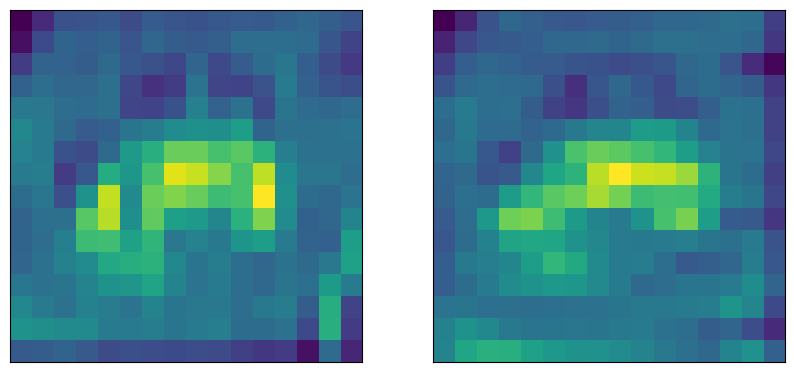

In [ ]:
out2 = tf.nn.conv2d(
    x_train[:10],
    filters,
    strides = 2, #strides
    padding = "SAME", # padding
    data_format='NHWC',
    dilations=None,
    name=None
)

show_out(out2)
out2.shape

### TODO: 5.1
1. Try conv2d with `strides` as 3 and store the output to `out3`.
2. Using `show_out` function, plot the `out3`.
3. Examine the shape of your `out3`.

TensorShape([10, 11, 11, 2])

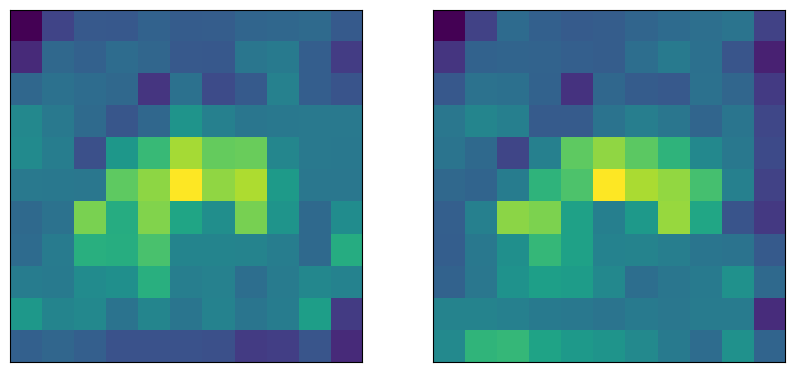

In [ ]:
out3 = tf.nn.conv2d(
    x_train[:10],
    filters,
    strides = 3, #strides
    padding = "SAME", # padding
    data_format='NHWC',
    dilations=None,
    name=None
)

show_out(out3)
out3.shape

## Pooling
A pooling layer is another building block of a CNN. Pooling Its function is to progressively reduce the spatial size of the representation to reduce the network complexity and computational cost.
[Refer to this link for better understanding](https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/#:~:text=A%20pooling%20layer%20is%20a,Convolutional%20Layer)

1. There are two types of widely used pooling in CNN layer:
   1. Average Pooling

   2. Max Pooling
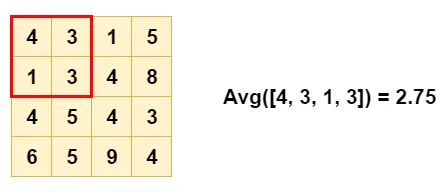

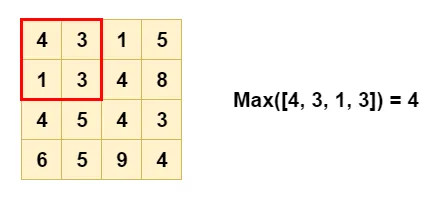

### TODO: 6
1. Using `keras.layers.MaxPool2D`, create an instance `max_pool` with `pool_size` 2. 
1. Apply `max_pool` to first 10 training images in `x_train` to store the output to `out4`. 
1. Using `show_out` to plot the max_pool output images.
  * HINT: pass 3 as the second argument to plot three images in a row. 
1. Print out the shape of `out4`.  

TensorShape([10, 16, 16, 3])

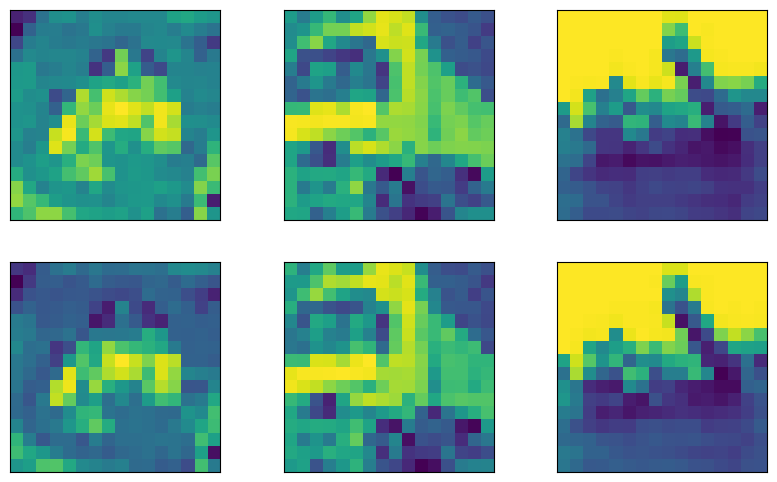

In [108]:
max_pool = tf.keras.layers.MaxPool2D(pool_size=2)
out4 = max_pool(x_train[:10])
show_out(out4, 3)
out4.shape


To compare the max pooling images with the input images we can plot the original images as below. 

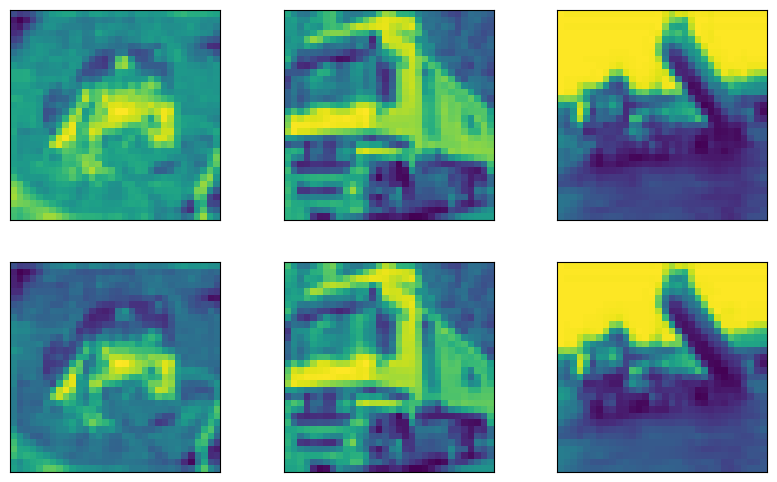

In [107]:
show_out(x_train, 3)

## Convolutaional Neural Networks
CNN were specifically designed to map image data to output variables. They’re particularly strong at developing internal representations of two-dimensional images that can be used to learn position and scale invariant structures. This makes them especially good at working with data that has a spatial relationship component.
The Basic Principle behind the working of CNN is the idea of Convolution, producing filtered Feature Maps stacked over each other.
A convolutional neural network consists of several layers.
1. Convolutional layers: perform mathematical operations on the input image to extract features.
1. Pooling layers: reduce the spatial dimensions of the image while retaining important features.
1. Fully connected layers: make the final prediction based on the features extracted by the convolutional and pooling layers.
[Reference link to learn more about cnn](https://cs231n.github.io/convolutional-networks/)


Now we are building a class for CNN model.

### TODO 7
1. Follow the image and create a CNN architecture
1. Complete the forward pass code. 

Hint: We use `keras.layers.Conv2D` ([reference](https://keras.io/api/layers/convolution_layers/convolution2d/)) for this practice.

![](https://webpages.uncc.edu/mlee173/teach/ml/images/class/dsba6165-lab5-conv.png)

In [112]:
class CNN(keras.Model):
    """Combines the normalizer and other layers."""

    def __init__(self):
        super().__init__()
        # self.normalizer = Normalizer(x_train)
        # self.DenseLayers = NetworkLayers(n_hidden, n_output, dropout)

        self.CNN_model = keras.Sequential(
            [
            keras.layers.Conv2D(32, kernel_size = (3,3), activation = "relu", input_shape = (32,32, 3)), 
            layers.MaxPool2D(pool_size=(2,2)),

            keras.layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
            layers.MaxPool2D(pool_size=(2,2)),

            keras.layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
            
            keras.layers.Flatten(),

            layers.Dense(64, activation = "relu"),
            layers.Dense(10),
            ])
        self.CNN_model.summary()

    def call(self, inputs):
        return self.CNN_model(inputs)

### TODO 7.1
1. Create a model using the CNN that was created above.
    1. Hint: No arguments are needed

In [114]:
model = CNN()

c:\Users\brean\miniconda3\envs\deeplearning\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

### TODO 7.2
1. Using `compile`, prepare your model to have "Adam" as an `optimizer`, have a `loss` function to be "SparseCategoricalCrossentropy" also it should take argument as(from_logits=True) and `metrics` as "accuracy".

In [156]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = optimizer, loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

### TODO 7.3
1. Using `fit`, train the model with training data (`x_train` and `y_train`). Train the model for 10 epochs, and "validation_data" be a tuple of test dataset.

<font color='red' style='bold'>NOTE: this code runs for a long time. Be sure to run in colab or on GPU. </font>



In [157]:
%%time
history = model.fit(x = x_train, y = y_train, epochs = 10,
                verbose = 0, validation_data=(x_test, y_test))

CPU times: total: 8min 25s
Wall time: 1min 52s



We have Created `plot_learning` function that plots the training and validation loss learning curve using the `history` argument. 

In [146]:
def plot_learning(history, label: str, metric, val_metric):
    plt.plot(history.history[metric], label=metric)
    plt.plot(history.history[val_metric], label=val_metric)
    plt.xlabel('Epoch')
    plt.ylabel(f'{label}')
    plt.legend()

### TODO 7.4
1.Plot the history using the `plot_learning`function which we created above.

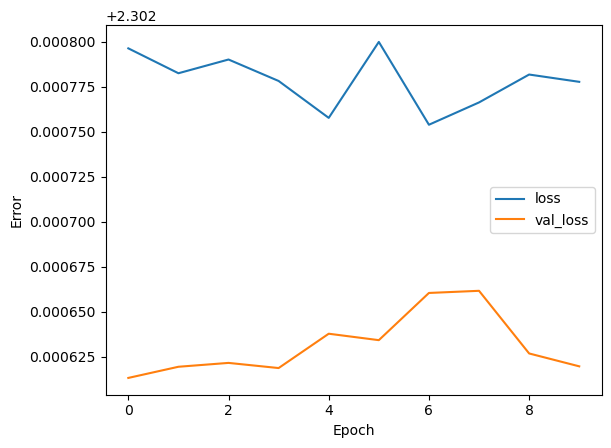

In [158]:
plot_learning(history, "Error", "loss", "val_loss")

### TODO 7.5
1.Using the `plot_learning` function plot the history but now give additional arguments such as 'accuracy', 'val_accuracy' and  'Accuracy'

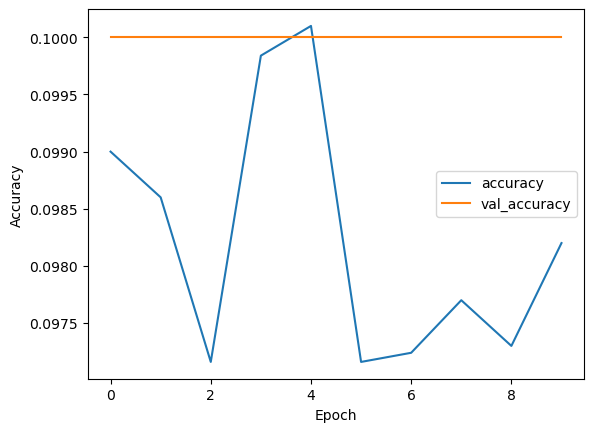

In [159]:
plot_learning(history, "Accuracy", "accuracy", "val_accuracy")

### TODO 7.6
1. `evaluate` the model on test data (`x_test` and `y_test`). 

In [160]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1000 - loss: 2.3026


[2.302619695663452, 0.10000000149011612]

In many cases, where the size of the array is too large, it takes too much time to find the maximum elements from them. For this purpose, the numpy module of Python provides a function called `numpy.argmax()`. This function returns indices of the maximum values are returned along with the specified axis.
### TODO 7.7
1. predict the model on test data (`x_test`) using `predict` function. 
2. Pass the output of this function to the `np.argmax` function.

In [161]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [162]:
np.argmax(predictions, axis=1)

array([7, 7, 7, ..., 7, 7, 7], dtype=int64)

### TODO 7.8
And finally lets plot the first 10 images of y_pred using subplot
1. Referring TODO 2.2, show the first 10 images with both labels and predictions. 
  * HINT: `show_img` has `bot` and `title` arguments for you to use for predictions and labels. 

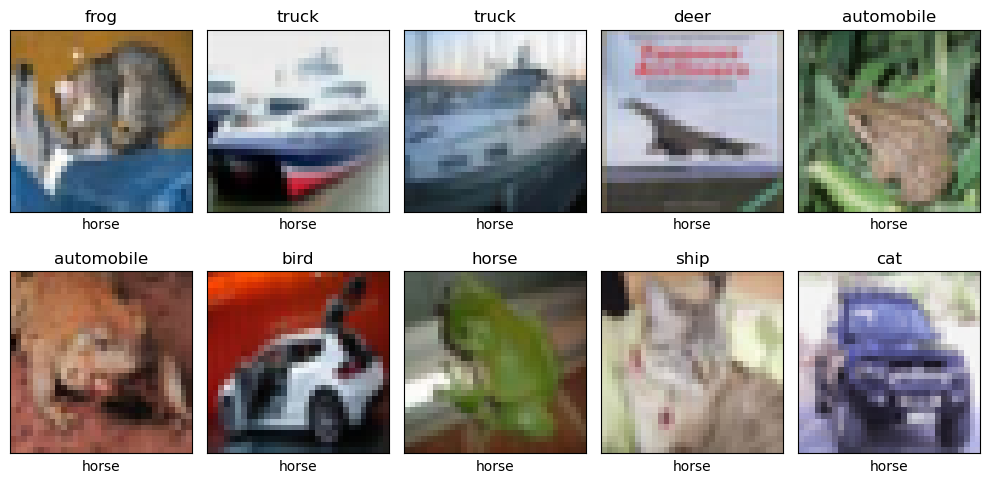

In [163]:
predictions = np.argmax(predictions, axis=1)
plt.figure(figsize = (10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    show_img(x_test[i], labels[y_train[i,0]], labels[predictions[i]])

plt.tight_layout()

### Additional Practice on Imagenet Data

### Imagenet Dataset

You can checkout the [data](https://github.com/fastai/imagenette) over here


<img src="https://cv.gluon.ai/_images/imagenet_banner.jpeg" width=500 />

Use the command below to download the dataset. Read more about [wget](https://linuxize.com/post/wget-command-examples/)


In [ ]:
#Mac Command
#!wget https://s3.amazonaws.com/fast-ai-imageclas/imagenette2.tgz

--2024-02-02 01:20:42--  https://s3.amazonaws.com/fast-ai-imageclas/imagenette2.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.206.88, 52.217.228.176, 52.217.234.160, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.206.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1557161267 (1.5G) [application/x-tar]
Saving to: ‘imagenette2.tgz’

imagenette2.tgz     100%[===================>]   1.45G  10.1MB/s    in 2m 42s  

2024-02-02 01:23:25 (9.17 MB/s) - ‘imagenette2.tgz’ saved [1557161267/1557161267]



Use the command below to extract the files. Read more about [tar](https://www.tutorialspoint.com/linux-tar-command)

In [171]:
#Windows Command
!curl -L -o imagenette2.tgz https://s3.amazonaws.com/fast-ai-imageclas/imagenette2.tgz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 1485M    0  169k    0     0   188k      0  2:14:30 --:--:--  2:14:30  188k
  0 1485M    0 1104k    0     0   581k      0  0:43:36  0:00:01  0:43:35  581k
  0 1485M    0 2515k    0     0   867k      0  0:29:13  0:00:02  0:29:11  867k
  0 1485M    0 4759k    0     0  1217k      0  0:20:48  0:00:03  0:20:45 1218k
  0 1485M    0 7445k    0     0  1519k      0  0:16:40  0:00:04  0:16:36 1520k
  0 1485M    0 10.1M    0     0  1763k      0  0:14:22  0:00:05  0:14:17 2046k
  0 1485M    0 14.8M    0     0  2197k      0  0:11:31  0:00:06  0:11:25 2811k
  1 1485M    1 20.1M    0     0  2606k      0  0:09:43  0:00:07  0:09:36 3615k
  1 1485M    1 26.1M    0     0  3008k      0  0:08:25  0:00:08  0:08:17 4409k
  2 1485M    2 32.7M    0     0  3391k      0  0:07

In [172]:
!tar -xf imagenette2.tgz

In [166]:
imagenette_map = { 
    "n01440764" : "tench",
    "n02102040" : "springer",
    "n02979186" : "casette_player",
    "n03000684" : "chain_saw",
    "n03028079" : "church",
    "n03394916" : "French_horn",
    "n03417042" : "garbage_truck",
    "n03425413" : "gas_pump",
    "n03445777" : "golf_ball",
    "n03888257" : "parachute"
}

### TODO 8
Load images using `ImageDataGenerator`. [Read More](https://keras.io/api/preprocessing/image/)

Keras has this useful functionality for loading large images (like we have here) without maxing out the RAM, by doing it in small batches. ImageDataGenerator, in combination with fit_generator provides this functionality. `ImageDataGenerator` is a class in the Keras library in Python that is used to preprocess and image data augmentation.

1. Initialize `ImageDataGenerator()`
2. Use `.flow_from_directory()` to set your training and validation set.

In [203]:
image_generator = keras.preprocessing.image.ImageDataGenerator()
image_generator.flow_from_directory("./imagenette2/train")
image_generator.flow_from_directory("./imagenette2/val")

Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.


### TODO 9
1. Follow the image and create a `CNN` architecture.
    
    Hint: Use `Sequential`

Warning: Based on the image below, create a neural network (CNN)

In [199]:
# Build your model in the next cell
class CNN(keras.Model):
    """Combines the normalizer and other layers."""

    def __init__(self):
        super().__init__()
        # self.normalizer = Normalizer(x_train)
        # self.DenseLayers = NetworkLayers(n_hidden, n_output, dropout)

        self.CNN_model = keras.Sequential(
            [
            keras.layers.InputLayer(shape = (224,224,3)),

            keras.layers.Conv2D(25, kernel_size = (1,1), activation = "relu", input_shape = (32,32, 3)), 
            layers.MaxPool2D(pool_size=(2,2)),

            keras.layers.Conv2D(50, kernel_size = (57,57), activation = "relu"),
            layers.MaxPool2D(pool_size=(2,2)),

            keras.layers.BatchNormalization(),

            keras.layers.Conv2D(70, kernel_size = (15,15), activation = "relu"),
            layers.MaxPool2D(pool_size=(2,2)),
            
            keras.layers.BatchNormalization(),

            keras.layers.Flatten(),

            layers.Dense(100, activation = "relu"),
            layers.Dense(100),

            keras.layers.Dropout(0.2, noise_shape=None, seed=None),  

            layers.Dense(10),
            ])
        # self.CNN_model.summary()

    def call(self, inputs):
        return self.CNN_model(inputs)

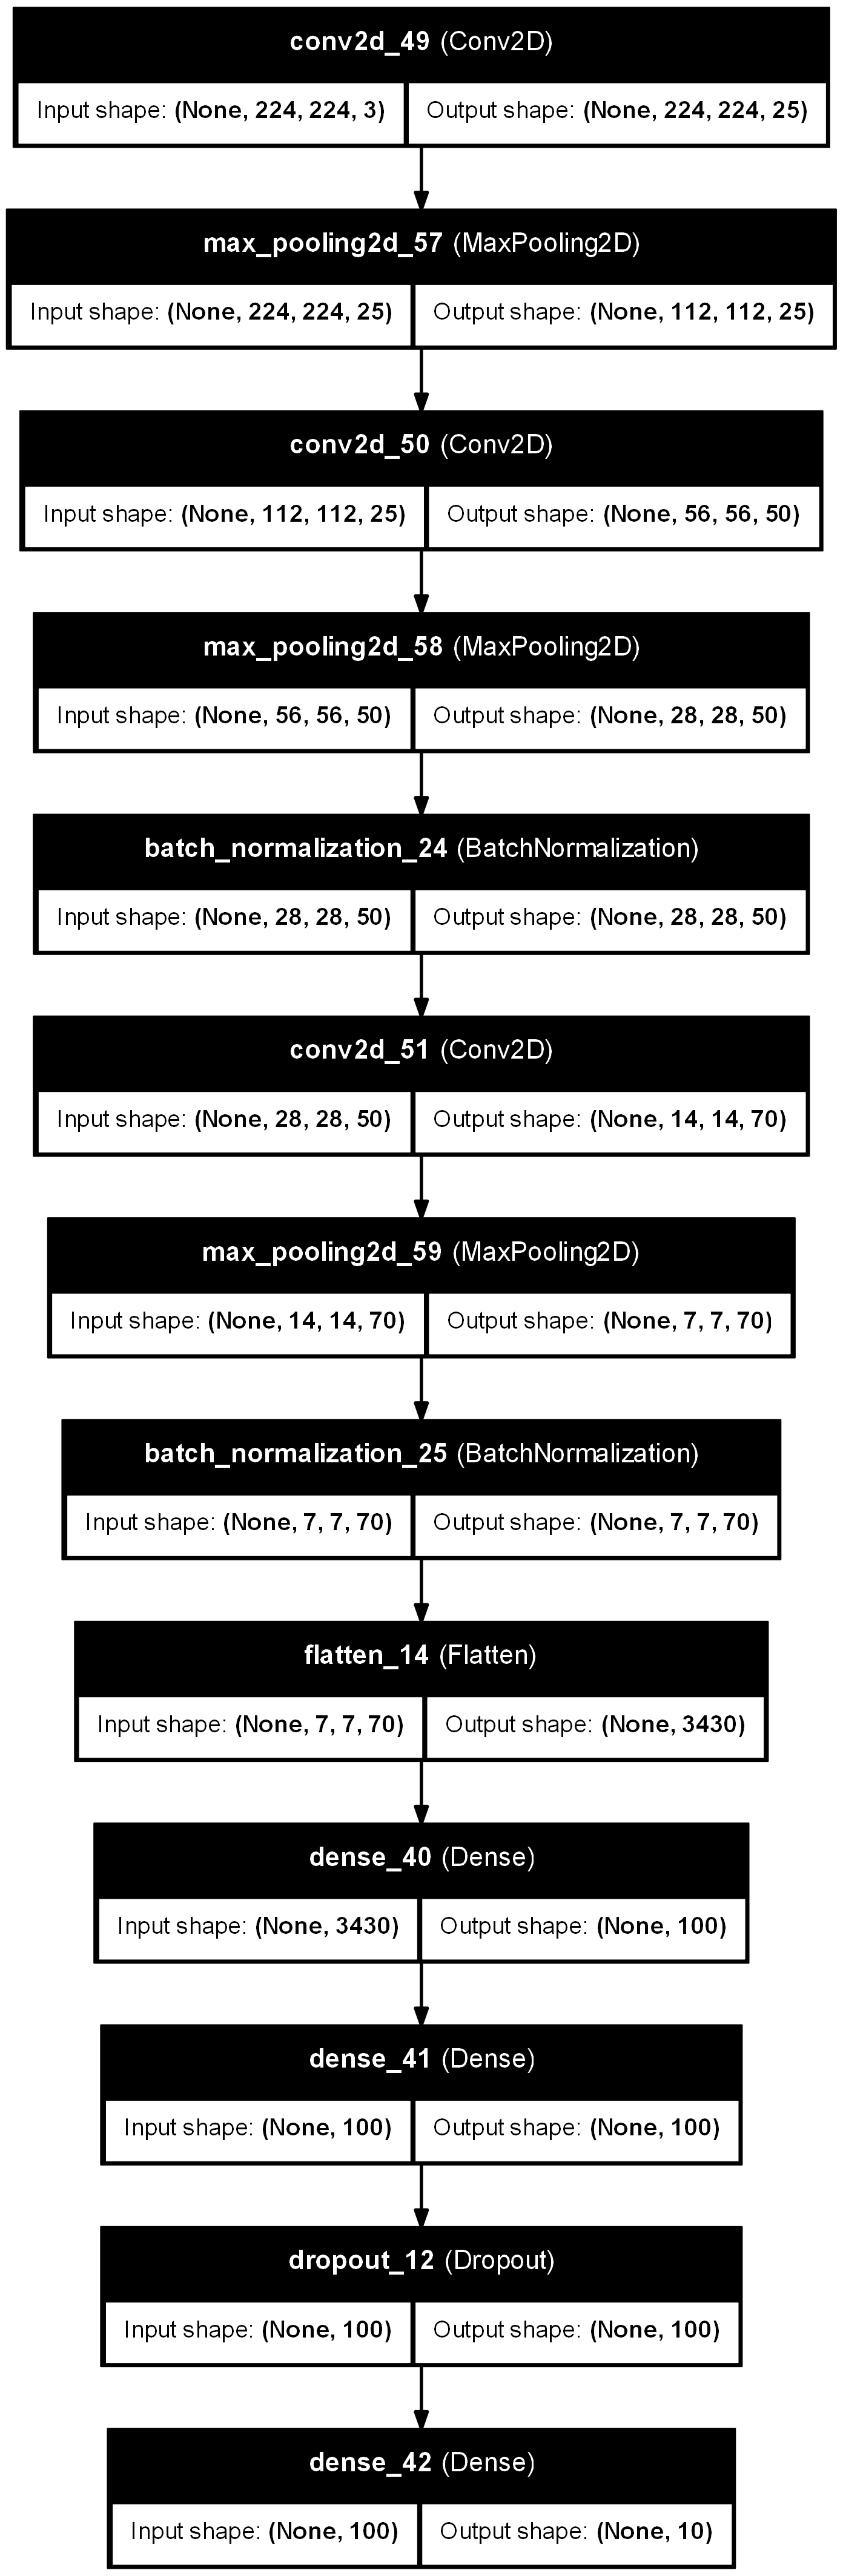

In [200]:
model = CNN()
plot_model(model.CNN_model, show_shapes=True, show_layer_names=True)

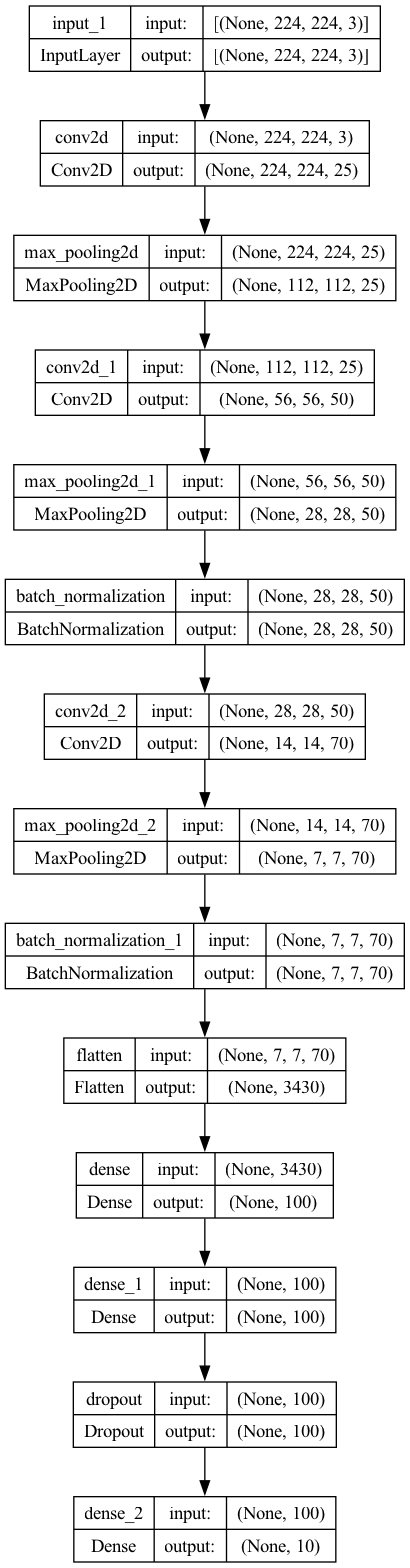

### TODO 10
1. Use `.compile()` to compile the model with the following parameters.

    loss = "`categorical_crossentropy`", 
    optimizer = "`adam`", 
    metrics = "`accuracy`"

In [201]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = optimizer, loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

### TODO 11
1. Use `.fit()` to fit your model.
2. Plot the `loss` and `accuracy` curves using `plot_learning(history)`.

In [ ]:
image_generator.flow_from_directory("./imagenette2/train")
image_generator.flow_from_directory("./imagenette2/val")

In [202]:
%%time
history = model.fit(x = x_train, y = y_train, epochs = 10,
                verbose = 0, validation_data=(x_test, y_test))

CPU times: total: 4.61 s
Wall time: 7.05 s


ValueError: Exception encountered when calling Conv2D.call().

[1mNegative dimension size caused by subtracting 57 from 16 for '{{node cnn_18_1/sequential_14_1/conv2d_50_1/convolution}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](cnn_18_1/sequential_14_1/max_pooling2d_57_1/MaxPool2d, cnn_18_1/sequential_14_1/conv2d_50_1/convolution/ReadVariableOp)' with input shapes: [?,16,16,25], [57,57,25,50].[0m

Arguments received by Conv2D.call():
  • inputs=tf.Tensor(shape=(None, 16, 16, 25), dtype=float32)

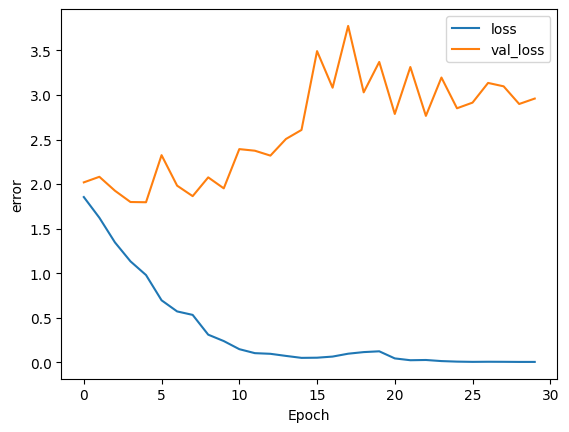

In [ ]:
plot_learning(history, "Error", "loss", "val_loss")

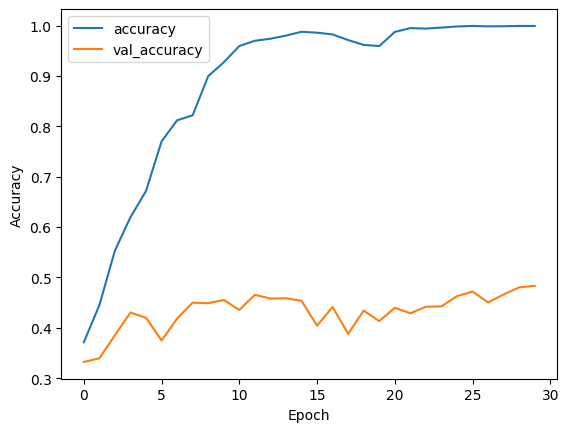

In [ ]:
plot_learning(history, "Accuracy", "accuracy", "val_accuracy")

# More Complex CNN Architecture

When we compare the validation accuracy of the above model, you’ll realize that even though it is a more deep architecture than what we have utilized so far, we are only able to get a validation accuracy of around 40-50%. Following could be the reasons:

        1. Our model is not complex enough to learn the underlying patterns of images.
        
        2. Maybe the training data is too small to accurately generalize across classes.

Hence, let us use a more complex architecture, [VGG16](https://www.robots.ox.ac.uk/~vgg/research/very_deep/) for the following practice.
`VGG16` is a CNN architecture that was the first runner-up in the 2014 `ImageNet` Challenge. It’s designed by the Visual Graphics Group at Oxford and has 16 layers in total, with 13 convolutional layers themselves. The model that we will use is pretrained with ImageNet data. The pretrained model is often finetuned (trained further) with the target data. This approach is known as "transer learning", which we will discuss later in this course.

We will load the pre-trained weights of VGG-16 so that we can utilize the useful features this model has learned for our task.

### TODO 12
1. Import `from keras.applications import VGG16`.
2. Initialize `VGG16(include_top=False, weights='imagenet')`.


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

### TODO 13
Generate features from VGG16. Let’s extract useful features that VGG16 already knows from our dataset’s images.
1. Extract `train` and `val` features using the features of VGG16. 

    Hint: You can use the pretrained model's `.predict()`


2. Use `to_categorical()` for `One-Hot` Encoding, as we did in Lab 4.

12/74 [===>..........................] - ETA: 12:39

KeyboardInterrupt: 

(array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]], dtype=float32),
 array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]], dtype=float32))

### TODO 14

1. Follow the image below and create a `CNN` architecture.

    Hint: Use `Sequential` and create a new model.

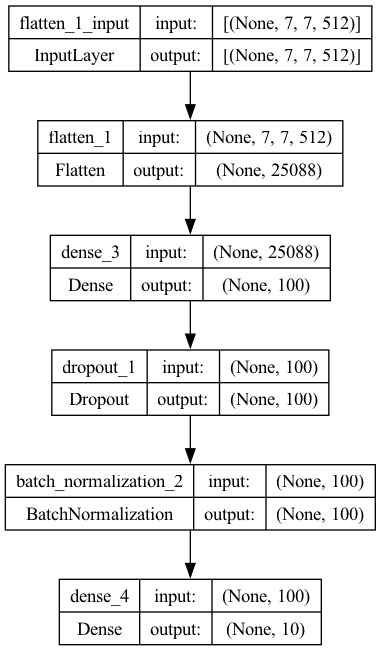

### TODO 15

1. Use `.compile()` with the same hyperparameters used in the above model.
2. Summarize the model using `.summary()`

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 100)               2508900   
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 batch_normalization_2 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 2510310 (9.58 MB)
Trainable params: 2510110 (9.58 MB)
Non-trainable params: 200 (800.00 Byte)
____________

### TODO 16
1. Fit the model using `.fit()`, x as `vgg_features_train`, y as `train_target`, `epochs = 50`, `batch_size = 128`. Use `validation_data=(vgg_features_val, val_target)`
2. Plot the learning history for accuracy 

Epoch 1/50
74/74 [==============================] - 1s 13ms/step - loss: 0.0043 - accuracy: 0.9983 - val_loss: 0.2498 - val_accuracy: 0.9383
Epoch 2/50
74/74 [==============================] - 1s 9ms/step - loss: 0.0075 - accuracy: 0.9984 - val_loss: 0.2470 - val_accuracy: 0.9381
Epoch 3/50
74/74 [==============================] - 1s 8ms/step - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.2507 - val_accuracy: 0.9394
Epoch 4/50
74/74 [==============================] - 1s 8ms/step - loss: 0.0037 - accuracy: 0.9995 - val_loss: 0.2586 - val_accuracy: 0.9396
Epoch 5/50
74/74 [==============================] - 1s 8ms/step - loss: 0.0045 - accuracy: 0.9990 - val_loss: 0.2628 - val_accuracy: 0.9399
Epoch 6/50
74/74 [==============================] - 1s 8ms/step - loss: 0.0034 - accuracy: 0.9989 - val_loss: 0.2599 - val_accuracy: 0.9383
Epoch 7/50
74/74 [==============================] - 1s 8ms/step - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.2577 - val_accuracy: 0.9401
Epoch 8/50
74/74 [=

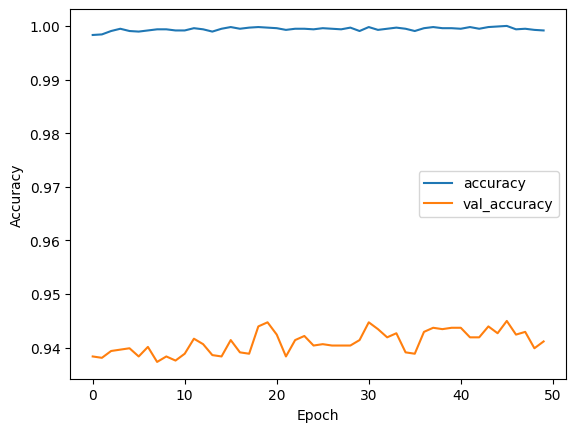